In [7]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('./[WFW-Group10-FOK YE]  CS 132 Finalized Dataset.csv')
df.head()

,Species,Geolocation,Year,Quarter,Value,Volume
0,All Species,National Capital Region (NCR),2020,Quarter 1,10190.23,250.84
1,All Species,Cordillera Administrative Region (CAR),2020,Quarter 1,72535.13,703.32
2,All Species,Region I (Ilocos Region),2020,Quarter 1,3062615.94,27212.01
3,All Species,Region II (Cagayan Valley),2020,Quarter 1,213501.70,2073.65
4,All Species,Region III (Central Luzon),2020,Quarter 1,9137119.99,74439.96


In [15]:
print(df['Geolocation'].unique())
print(df['Species'].unique())

['National Capital Region (NCR)' 'Cordillera Administrative Region (CAR)'
 'Region I (Ilocos Region)' 'Region II (Cagayan Valley)'
 'Region III (Central Luzon)' 'Region IV-A (CALABARZON)' 'MIMAROPA Region'
 'Region V (Bicol Region)' 'Region VI (Western Visayas)'
 'Region VII (Central Visayas)' 'Region VIII (Eastern Visayas)'
 'Region IX (Zamboanga Peninsula)' 'Region X (Nothern Mindanao)'
 'Region XI (Davao Region)' 'Region XII (SOCCSKSARGEN)'
 'Region XIII (Caraga)'
 'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)']
['All Species' 'Milkfish' 'Tilapia' 'Tiger Prawn' 'Mudcrab'
 'Endeavor Prawn' 'White Shrimp' 'Grouper' 'Siganid' 'P. Vannamei'
 'Spiny Lobster' 'Carp' 'Catfish' 'Gourami' 'Mudfish' 'Freshwater Prawn'
 'Others' 'Oyster' 'Mussel' 'Seaweed']


c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Lik

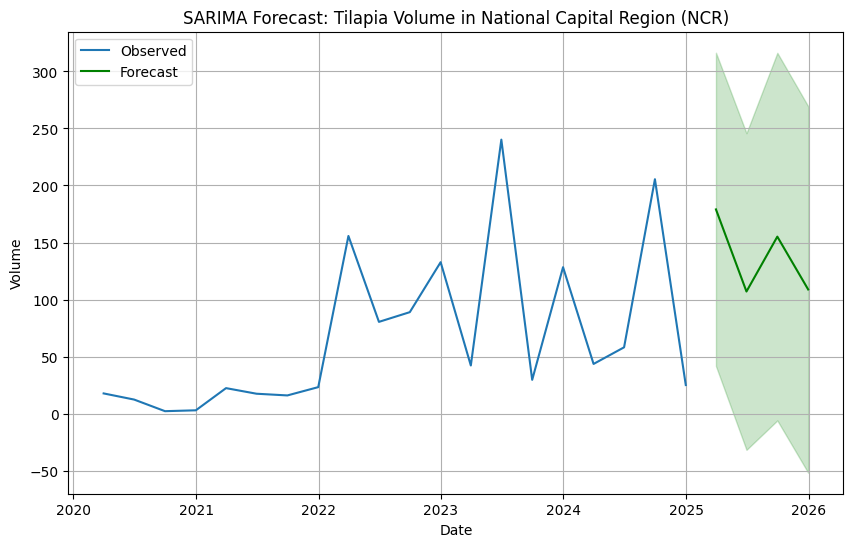

In [14]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

df = pd.read_csv('./[WFW-Group10-FOK YE]  CS 132 Finalized Dataset.csv')

region = 'National Capital Region (NCR)'
species = 'Tilapia'

df_filtered = df[(df['Geolocation'] == region) & (df['Species'] == species)].copy()

quarter_mapper = {
    ' Quarter 1': '03-31',
    ' Quarter 2': '06-30',
    ' Quarter 3': '09-30',
    ' Quarter 4': '12-31'
}
df_filtered['date'] = df_filtered['Year'].astype(str) + '-' + df_filtered['Quarter'].map(quarter_mapper)
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

df_filtered = df_filtered.sort_values('date')
ts = df_filtered.groupby('date')['Volume'].sum()

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4))
results = model.fit()

forecast = results.get_forecast(steps=4)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10,6))
plt.plot(ts, label='Observed')
plt.plot(pred, label='Forecast', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2)
plt.title(f'SARIMA Forecast: {species} Volume in {region}')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(p,d,q)
model = ARIMA(ts, order=(1, 1, 1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 6800
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78016.745
Date:                Sun, 18 May 2025   AIC                         156039.490
Time:                        03:24:56   BIC                         156059.964
Sample:                             0   HQIC                        156046.556
                               - 6800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1027      0.018     -5.782      0.000      -0.137      -0.068
ma.L1         -0.9214      0.006   -163.257      0.000      -0.932      -0.910
sigma2      6.561e+08   5.74e-11   1.14e+19      0.0

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4))  # quarterly seasonality
fitted = model.fit()
print(fitted.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                 6800
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood              -77887.135
Date:                           Sun, 18 May 2025   AIC                         155784.271
Time:                                   03:25:02   BIC                         155818.390
Sample:                                        0   HQIC                        155796.045
                                          - 6800                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1022      0.015     -6.797      0.000      -0.132      -0.073
ma.L1         -0.9088      0.005   -174.897

c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


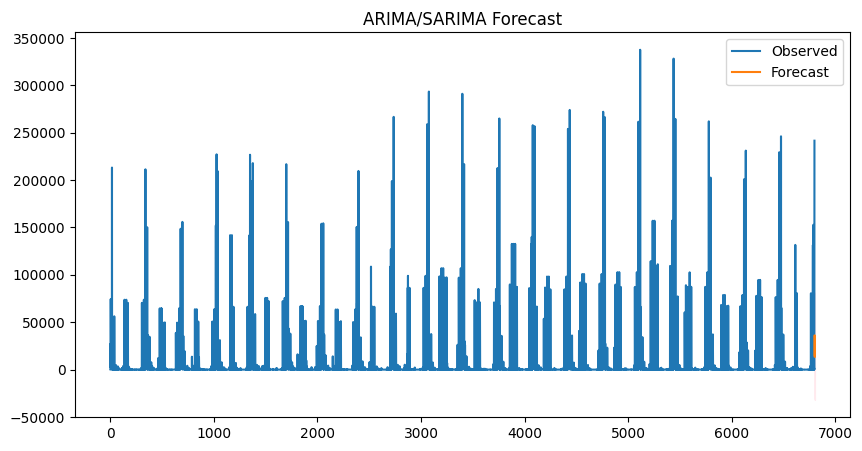

In [12]:
forecast = fitted.get_forecast(steps=4)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ts, label='Observed')
plt.plot(pred, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title("ARIMA/SARIMA Forecast")
plt.show()

In [13]:
mapper = {
    ' Quarter 1': 'March 31',
    ' Quarter 2': 'June 30',
    ' Quarter 3': 'September 30',
    ' Quarter 4': 'December 31'
}
df['date'] = df['Quarter'].map(mapper)
df['ds'] = df['date'] + ' ' + df['Year'].astype(str)
df['y'] = df['Volume']
dtf = df[['ds', 'y']].copy()

In [18]:
model = Prophet(yearly_seasonality=False)
model.add_seasonality(name='quarterly', period=4, fourier_order=3)
model.fit(dtf)

10:40:12 - cmdstanpy - INFO - Chain [1] start processing
10:40:12 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=4, freq='Q')  # freq='Q' means quarterly
forecast = model.predict(future)

c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


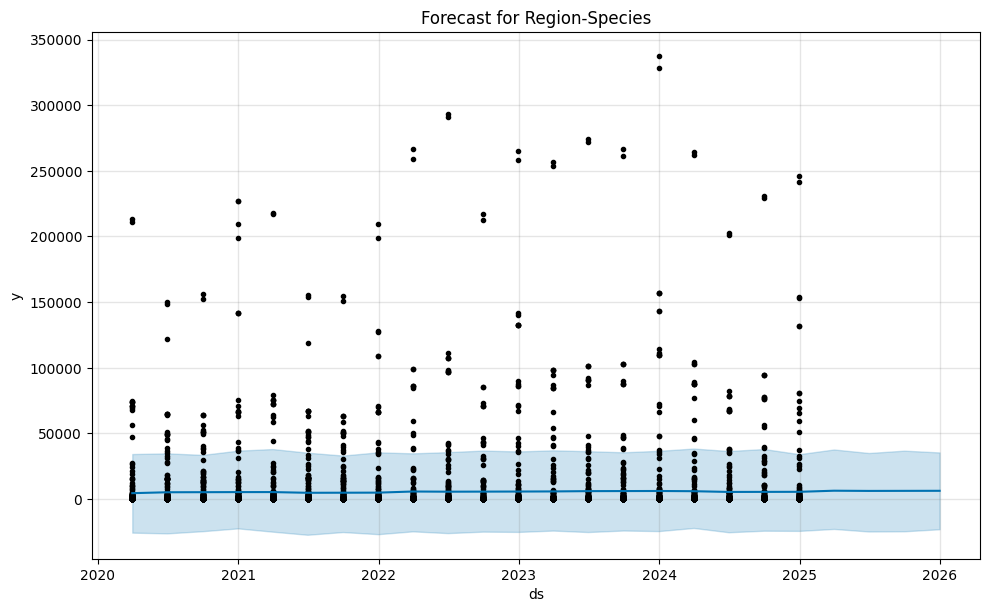

In [20]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Forecast for Region-Species")
plt.show()